## Mental health data analysis

This is the notebook to analyze the [mental health dataset](https://www.kaggle.com/datasets/sumansharmadataworld/depression-surveydataset-for-analysis) with the main goal to identify key contributors to depression.

The work is divided in 3 steps:
- Data extraction 
- Data transformation
- Data analysis
- Modeling and predicting

We will start by importing necessary libraries.

In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import RocCurveDisplay, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression



# Extracting data
As a first step, we import the projects data from the csv file downloaded from [Kaggle](https://www.kaggle.com/datasets/sumansharmadataworld/depression-surveydataset-for-analysis). Then, we show the first 5 rows of the set and check the number of available points of the dataset.


In [2]:
df = pd.read_csv('data/final_depression_dataset.csv')
df.head()

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Pooja,Female,37,Ghaziabad,Working Professional,Teacher,NaN,2.0,NaN,NaN,4.0,7-8 hours,Moderate,MA,No,6,2,No,No
1,Reyansh,Male,60,Kalyan,Working Professional,Financial Analyst,NaN,4.0,NaN,NaN,3.0,5-6 hours,Unhealthy,B.Com,Yes,0,4,Yes,No
2,Manvi,Female,42,Bhopal,Working Professional,Teacher,NaN,2.0,NaN,NaN,3.0,5-6 hours,Moderate,M.Com,No,0,2,No,No
3,Isha,Female,44,Thane,Working Professional,Teacher,NaN,3.0,NaN,NaN,5.0,7-8 hours,Healthy,MD,Yes,1,2,Yes,No
4,Aarav,Male,48,Indore,Working Professional,UX/UI Designer,NaN,4.0,NaN,NaN,3.0,7-8 hours,Moderate,BE,Yes,6,5,Yes,No


In [3]:
print("Numer of columns is:", df.shape[1])
print("Numer of rows is:", df.shape[0])

Numer of columns is: 19
Numer of rows is: 2556


Now, we can list the names of all 19 columns:

In [4]:
df.columns

Index(['Name', 'Gender', 'Age', 'City', 'Working Professional or Student',
       'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
       'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness', 'Depression'],
      dtype='object')

Lets check which of these columns are numerical (and their description):

In [5]:
df.describe()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress
count,2556.000000,502.000000,2054.000000,502.000000,502.000000,2054.000000,2556.000000,2556.000000
mean,39.043036,3.003984,3.021908,7.567809,3.075697,3.015093,6.023865,2.968701
std,12.260596,1.390007,1.417312,1.465367,1.373490,1.418432,3.771743,1.415527
min,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000
25%,28.000000,2.000000,2.000000,6.210000,2.000000,2.000000,3.000000,2.000000
50%,39.000000,3.000000,3.000000,7.605000,3.000000,3.000000,6.000000,3.000000
75%,50.000000,4.000000,4.000000,8.825000,4.000000,4.000000,9.000000,4.000000
max,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000


Thus, there are 13 categorical columns.

# Transform data

As the second step, we will transform data such that we can use it later for creating the model for generating predictions.
We will do that in using the following steps:
- Check missing data for each column
- Replace the missing data if applicable
- Replace categorical categories to the numerical ones if applicable

In [6]:
df_tmp = df.isna().sum()
print("Print only columns that have at least one NaN value:")
print(df_tmp[df_tmp>0])

Print only columns that have at least one NaN value:
Profession             673
Academic Pressure     2054
Work Pressure          502
CGPA                  2054
Study Satisfaction    2054
Job Satisfaction       502
dtype: int64


Thus, we can conclude that only 6 out of 19 columns have some missing values. Interestingly, the number of the rows in the dataset is 2556, exacty as the sum of missing values of Study and Job Satisfaction (or the sum of Work and Academic Pressure). Lets dive deeper into this!

In [7]:
#check that there is no overlap between Academic Pressure and Work Pressure (i.e., there is no a datapoint which has existing values for both columns)
notnon_pressure = (df['Academic Pressure']+df['Work Pressure']).notna().sum()
print("Number of rows where both Academic and Work Pressure are not NaN:", notnon_pressure)
notnon_satisfaction = (df['Study Satisfaction']+df['Job Satisfaction']).notna().sum()
print("Number of rows where both Study and Work Satisfaction are not NaN:", notnon_satisfaction)

Number of rows where both Academic and Work Pressure are not NaN: 0
Number of rows where both Study and Work Satisfaction are not NaN: 0


This implies that these we could create a single column names Study/Work Pressure (Study/Work Satisfaction) that cointaines joined information from these both columns and no missing or NaN value. Also, we will delete individual columns.

In [8]:
df["Work/Study Pressure"]=df['Work Pressure'].fillna(0)+df['Academic Pressure'].fillna(0)
df["Work/Study Satisfaction"]=df['Job Satisfaction'].fillna(0)+df['Study Satisfaction'].fillna(0)

# remove unused columns
df.drop(columns=["Work Pressure", "Academic Pressure", "Job Satisfaction", "Study Satisfaction"], inplace = True)

Lets check again NaN values in the dataset!

In [9]:
# check if more nans in the current df
df_tmp = df.isna().sum()
print("Print only columns that have at least one NaN value:")
print(df_tmp[df_tmp>0])

Print only columns that have at least one NaN value:
Profession     673
CGPA          2054
dtype: int64


Now, we have only two columns with NaN values. 
- The first one is <b>Profession</b> and there we could check if <b>Student</b> is considered to be a profession. Then, we can check how many different professions there are and could we aggregate that data.
- The second one is <b>CGPA</b>. Since the score is related to students and there is 2054 NaN values of such, we can conclude that for the working professionals that field was not filled. So, there is not much we can do about NaN values in the field.


Lets start working with the field <b>Profession</b>!

In [10]:
# replace NaN values of students in the column Profession 
before_fix = df["Profession"].isna().sum()
print("The number of NaN values in the column Profession before the fix:", before_fix)

df["Profession"] = df.apply(lambda x: "Student" if pd.isna(x["Profession"]) and x["Working Professional or Student"]=="Student" else x["Profession"], axis = 1)
after_fix = df["Profession"].isna().sum()
print("The number of NaN values in the column Profession after the fix:", after_fix)


The number of NaN values in the column Profession before the fix: 673
The number of NaN values in the column Profession after the fix: 171


Thus, we can reduce the number od NaNs in the column Profession to 171. Lets check how the data looks like in this column and if we can find some correlation for the depression.

In [11]:
ser_tmp = df["Profession"].value_counts()
print("The most common professions in the dataset:")
print(ser_tmp.head().index.values)
print("The number of different professions in the dataset:")
print(ser_tmp.shape[0])

The most common professions in the dataset:
['Student' 'Teacher' 'Content Writer' 'HR Manager' 'Pharmacist']
The number of different professions in the dataset:
36


There are 36 different professions and Student is the most common one. Lets check if there is some relation to Depression (categorical binary data column).To make this easier lets replace Yes and No to 1 and 0 in the column Depression.

In [12]:
# mapping of binary string values to int
d = {"No": 0, "Yes": 1}
df["Depression"] = df["Depression"].map(d)


The most depressed professions:
['Student' 'Graphic Designer' 'HR Manager' 'Data Scientist' 'Judge']
The least depressed professions:
['Pharmacist' 'Entrepreneur' 'Chemist' 'Travel Consultant'
 'Software Engineer']


We continue to resolve binary categorical data to numerical values.

In [13]:

df["Have you ever had suicidal thoughts ?"] = df["Have you ever had suicidal thoughts ?"].map(d)
df["Family History of Mental Illness"] = df["Family History of Mental Illness"].map(d)


In [14]:
d = {"Working Professional": 0, "Student": 1}
df["Working Professional or Student"] = df["Working Professional or Student"].map(d)

In [15]:
d = {"Male": 0, "Female": 1}
df["Gender"] = df["Gender"].map(d)

We have now replaced all columns with binary categorical data. Lets check how the dataset looks now!

In [16]:
df.describe()

,Gender,Age,Working Professional or Student,CGPA,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Work/Study Pressure,Work/Study Satisfaction
count,2556.000000,2556.000000,2556.000000,502.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000
mean,0.478482,39.043036,0.196401,7.567809,0.488654,6.023865,2.968701,0.487089,0.178013,3.018388,3.026995
std,0.499635,12.260596,0.397353,1.465367,0.499969,3.771743,1.415527,0.499931,0.382598,1.411739,1.409659
min,0.000000,18.000000,0.000000,5.030000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,28.000000,0.000000,6.210000,0.000000,3.000000,2.000000,0.000000,0.000000,2.000000,2.000000
50%,0.000000,39.000000,0.000000,7.605000,0.000000,6.000000,3.000000,0.000000,0.000000,3.000000,3.000000
75%,1.000000,50.000000,0.000000,8.825000,1.000000,9.000000,4.000000,1.000000,0.000000,4.000000,4.000000
max,1.000000,60.000000,1.000000,10.000000,1.000000,12.000000,5.000000,1.000000,1.000000,5.000000,5.000000


Now lets look at the Sleep Duration and Dietary Habits columns. There we have 4 different string values that can be ordered, so we can replace them by numerical data.

In [17]:
d = {"Less than 5 hours": 0, "5-6 hours": 1, "7-8 hours":2, "More than 8 hours": 3}
df["Sleep Duration"] = df["Sleep Duration"].map(d)

In [18]:
d = {"Unhealthy": 0, "Moderate": 1, "Healthy":2}
df["Dietary Habits"] = df["Dietary Habits"].map(d)

Lets look into Degree column. We can aggregate data such that we get only 4 categories: Class 12, Bachelor, Master, PhD. These categories correspond to number of years spent in education.

In [19]:
df["Degree"] = df["Degree"].apply(lambda x: "Bachelor" if (x[0]=='B' or x[-1]=='B') else "Master" if (x[0]=='M' or x[-1]=='M') else "PhD" if x=="PhD" else x)

Now we can replace the categorical data (since it can be ordered by number of years spent in education) into numerical data.

In [20]:
d = {"Class 12":0, "Bachelor": 1, "Master": 2, "PhD":3}
df["Degree"] = df["Degree"].map(d)

We can check the number of remaining non-numerical columns:

In [21]:
print("The number of columns:", df.shape[1])
print("The number of columns with numerical data:", df.describe().shape[1])

The number of columns: 17
The number of columns with numerical data: 14


Thus, we have 3 columns with categorical data. These columns are Name, City, and Profession. Lets try to do modeling without using these columns. 

# Data analysis
We will try to answer the following questions:
- What are the most common professions that suffer from Depression?
- Which columns have a strong correlation with suffering from Depression?
- If student, what is the relation with Depression and students CGPA?

The following answers the first question:

In [24]:
# most depressed professions
print("The most depressed professions:")
print(df.groupby(["Profession"])["Depression"].mean().sort_values(ascending=False).head().index.values)

# least depressed professions
print("The least depressed professions:")
print(df.groupby(["Profession"])["Depression"].mean().sort_values(ascending=True).head().index.values)

The most depressed professions:
['Student' 'Graphic Designer' 'HR Manager' 'Data Scientist' 'Judge']
The least depressed professions:
['Pharmacist' 'Entrepreneur' 'Chemist' 'Travel Consultant'
 'Software Engineer']


To answer the second question, lets see correlation heatmap.

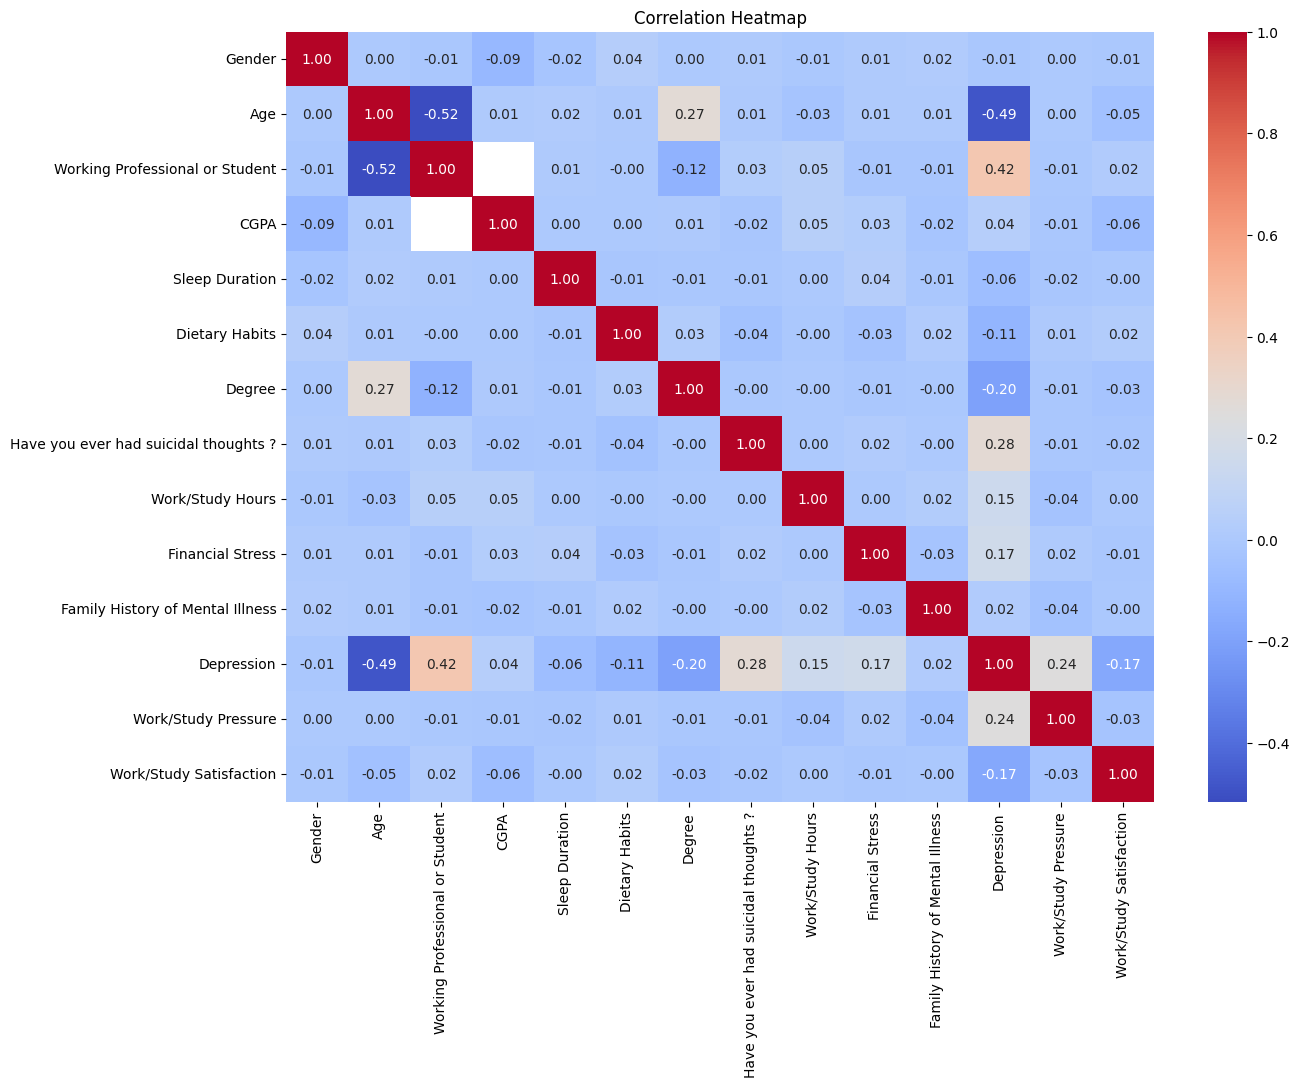

In [22]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

We notice that there is a strong correlation of Depression with Age, Working Professional/Student, Have you had suicidal thoughts, Work/Study Pressure, Degree, Work/Study Pressure and Work/Study Satisfaction.

Some <b>conclusions</b> are:
- Younger people are more likely to suffer from depression
- Students are more likely to suffer from depression (since Students are mapped to 1)
- If people have reported suicidal thought, they are more likely to suffer from depression
- People reporting more Work/Study pressure and less Work/Study satisfaction are more likely to suffer from depression
- People that spent less years in education are more likely to suffer from depression

To answer the third question, we only consider df rows where profession is student.

In [30]:
df_student = df[df["Profession"]=="Student"]
df_student.groupby(["Depression"])


# Modeling and prediction
As a third step, we select columns we use for creating the model based on logistic regression. The model will be used to predict if an individual is suffering from depression.

In [23]:

keep_cols = ["Gender", "Working Professional or Student", "Degree", 'Age', 'Sleep Duration',
       'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness', 'Work/Study Pressure', 'Work/Study Satisfaction']
X = df[keep_cols]
y = df["Depression"]

We separate train and test data, and normalize the input features.

In [154]:
# train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)

# normalize data
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# logistic regression model
lrc = LogisticRegression(solver='lbfgs', max_iter=3000)
lrc.fit(X_train_normalized, y_train)
y_train_preds= lrc.predict(X_train_normalized)
y_test_preds = lrc.predict(X_test_normalized)

# print results
print('logistic regression results')
print('test results')
print(classification_report(y_test, y_test_preds))
print('train results')
print(classification_report(y_train, y_train_preds))


logistic regression results
test results
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       647
           1       0.98      0.92      0.95       120

    accuracy                           0.98       767
   macro avg       0.98      0.96      0.97       767
weighted avg       0.98      0.98      0.98       767

train results
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1454
           1       0.98      0.91      0.94       335

    accuracy                           0.98      1789
   macro avg       0.98      0.95      0.97      1789
weighted avg       0.98      0.98      0.98      1789



The model has accuracy of 0.98 on test data. Lets look also it roc_curve, where we obtain the score 1.0.

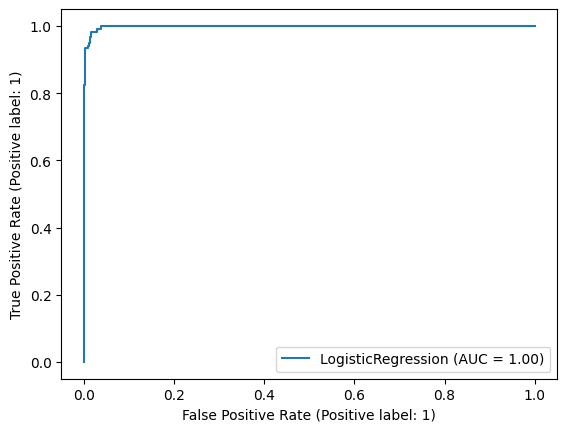

In [155]:
lrc_plot = RocCurveDisplay.from_estimator(lrc, X_test_normalized, y_test)

Lets try to understand when the model makes wrong predictions by looking into the confusion matrix.

Text(0.5, 427.9555555555555, 'Predicted label')

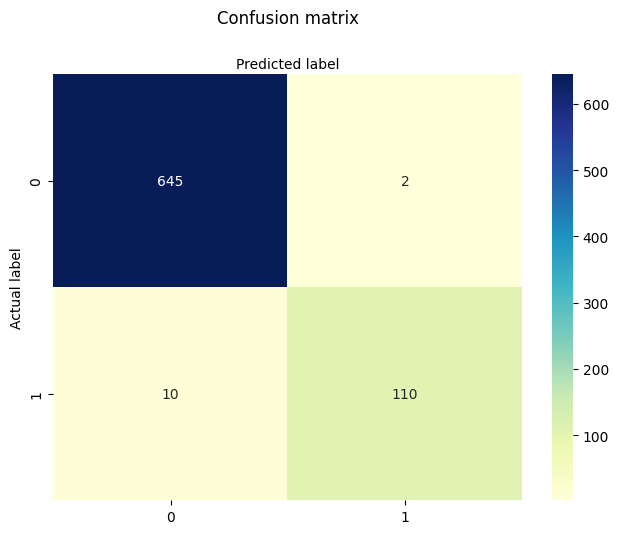

In [156]:
cnf_matrix = confusion_matrix(y_test, y_test_preds)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



We see that the model is more likely to produce false negatives than false positives.

# Conclusion

We have analysed mental health dataset from Kaggle. The main goal was to identify key factors that contribute to depression.
We can name the following:
- Age: Younger people are more likely to suffer from depression
- Students are more likely to suffer from depression 
- If people have reported suicidal thought, they are more likely to suffer from depression
- People reporting more Work/Study pressure and less Work/Study satisfaction are more likely to suffer from depression
- People that spent less years in education are more likely to suffer from depression

We have also created the model to predict if an individual is depressed. The accuracy of the logistic regression model is 0.98.